### Data Scrapping

In [6]:
import os
from dotenv import load_dotenv
import time
import os
import pandas as pd

In [2]:

load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
reddit_username = os.getenv("REDDIT_USERNAME")
reddit_password = os.getenv("REDDIT_PASSWORD")

import praw

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    username=reddit_username,
    password=reddit_password,
    user_agent="PoliticalOpinionDataScraper/1.0 by SunShine_949"
)

print("Read-Only Mode:", reddit.read_only)


Read-Only Mode: False


In [3]:
subreddits_list1 = [
    "IndianLeft", "BJPSupremacy", "IndianModerate", "politics", "The_Congress", 
    "librandu", "unitedstatesofindia", "indiadiscussion", "uttarpradesh", 
    "Congress", "indianews", "HindutvaRises", 
]

def scrape_it(subreddit_name, limit=100):
    print(f"Scraping data from r/{subreddit_name}...")
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    
    try:
        for post in subreddit.hot(limit=limit):
            posts.append({
                "subreddit": subreddit_name,
                "title": post.title,
                "score": post.score,
                "num_comments": post.num_comments,
                "created_utc": time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(post.created_utc)),
                "url": post.url,
                "author": str(post.author),
                "text": post.selftext
            })
    except Exception as e:
        print(f"Error while scraping r/{subreddit_name}: {e}")
    return posts

if __name__ == "__main__":
    all_posts = []
    
    for subreddit in subreddits_list1:
        posts = scrape_it(subreddit, limit=1000)  
        all_posts.extend(posts)  

    df = pd.DataFrame(all_posts)
    output_file = "IndianPoliticalData_v2_01.csv"
    df.to_csv(output_file, index=False)
    
    print(f"Scraped data saved to {output_file}")


Scraping data from r/IndianLeft...
Scraping data from r/BJPSupremacy...
Scraping data from r/IndianModerate...
Scraping data from r/politics...
Scraping data from r/The_Congress...
Scraping data from r/librandu...
Scraping data from r/unitedstatesofindia...
Scraping data from r/indiadiscussion...
Scraping data from r/uttarpradesh...
Scraping data from r/Congress...
Scraping data from r/indianews...
Scraping data from r/HindutvaRises...
Scraped data saved to IndianPoliticalData_v2_01.csv


### Preprocessing 

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re
import spacy
from langdetect import detect


In [3]:


nltk.download('stopwords')
nltk.download('punkt_tab')

def remove_emoji(text):
    pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F"
        "\U0001FA70-\U0001FAFF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return pattern.sub(r'', text)

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    text = remove_emoji(text)

    text = text.lower()

    text = re.sub(r'http\S+|www\.\S+|\S+\.(com|jpg|png|gif|jpeg)', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    try:
        if detect(text) != 'en':
            return ""
    except:
        return ""  

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

if __name__ == "__main__":
    input_file = "IndianPoliticalData_v2_01.csv"
    output_file = "CleanedData.csv"
    df = pd.read_csv(input_file)

    if 'title' in df.columns and 'text' in df.columns:
        df['title'] = df['title'].apply(clean_text)
        df['text'] = df['text'].apply(clean_text)
        df['text_combined'] = df['title'] + ' ' + df['text']

        output = df[['subreddit', 'title', 'text', 'text_combined']]
        output.to_csv(output_file, index=False)
        print(f"Cleaned data saved to {output_file}")
    else:
        print("Expected columns 'title' and 'text' not found in the provided CSV file.")



input_file = "CleanedData.csv" 
output_file = "CleanedData.csv"  

df = pd.read_csv(input_file)

df = df[df['text_combined'].str.strip() != ""]
df = df[df['title'].str.strip() != ""]
df = df[df['text'].str.strip() != ""]

df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


[nltk_data] Downloading package stopwords to /home/olspc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/olspc/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Cleaned data saved to CleanedData.csv
Data saved to CleanedData.csv


### Analysis
1. #### Word Toknization:

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk


Finding best clusters...


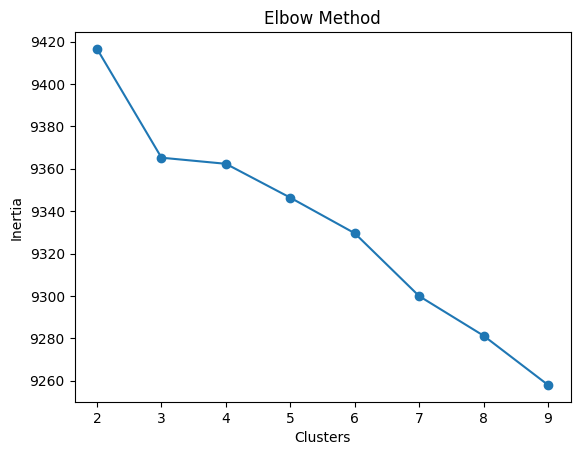

Clustering data...
Cluster words:
Cluster 0 Words: ['trump', 'donald', 'president', 'biden', 'election', 'house', 'says', 'new', 'republican', 'musk', 'gop', 'elon', 'case', 'news', 'georgia', 'abc', 'fani', 'willis', 'spending', 'plan', 'jan', 'appeals', 'inauguration', 'york', 'judge', 'joe', 'government', 'vs', 'tariffs', 'shutdown', 'vp', 'wants', 'funding', 'iowa', 'immunity', 'court', 'convention', 'coronavirus', 'capitol', 'americans', 'republicans', 'office', 'hush', 'american', 'putin', 'committee', 'media', 'mike', 'said', 'canada']
Cluster 1 Words: ['congress', 'indian', 'house', 'people', 'new', 'bjp', 'like', 'source', 'court', 'news', 'police', 'government', 'hindu', 'says', 'case', 'know', 'man', 'video', 'state', 'pradesh', 'dont', 'hindus', 'election', 'time', 'think', 'modi', 'report', 'indias', 'women', 'supreme', 'uttar', 'day', 'biden', 'trumps', 'delhi', 'years', 'maharashtra', 'bangladesh', 'senate', 'right', 'post', 'today', 'govt', 'need', 'party', 'vote', 'wan

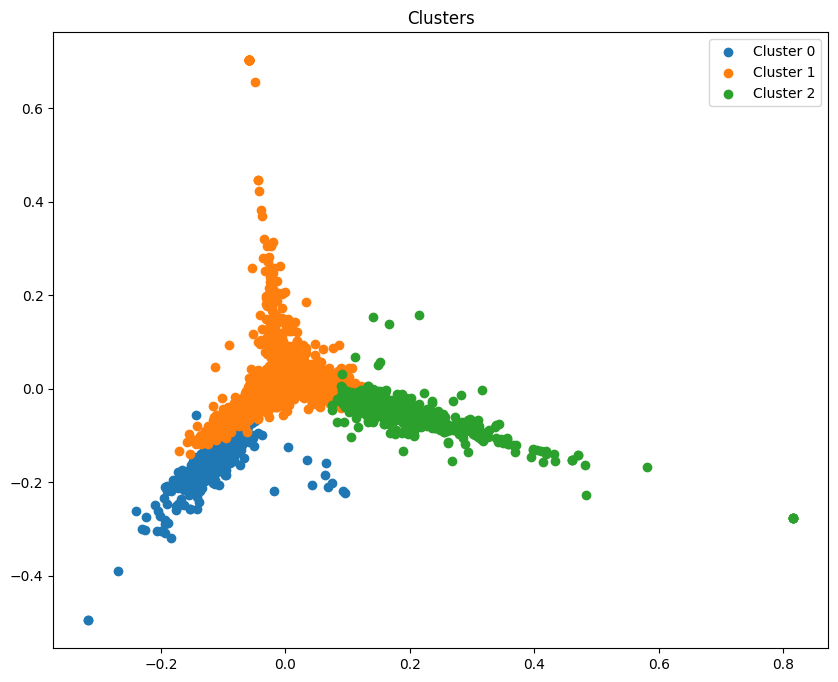

In [23]:

def load_data(file):
    df = pd.read_csv(file)
    df = df.dropna(subset=['text_combined'])
    texts = df['text_combined'].tolist()
    return df, texts

# Calculate TF-IDF
def get_tfidf(texts, max_feat=5000):
    vec = TfidfVectorizer(max_features=max_feat, stop_words='english')
    tfidf = vec.fit_transform(texts)
    return tfidf, vec

# Find best clusters
def best_clusters(tfidf, max_k=10):
    scores = []
    for k in range(2, max_k):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(tfidf)
        scores.append(km.inertia_)
    plt.plot(range(2, max_k), scores, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.savefig('Inetria.png')
    plt.show()
    return scores

# Cluster Smple
def cluster_data(tfidf, n_clust):
    km = KMeans(n_clusters=n_clust, random_state=42)
    labels = km.fit_predict(tfidf)
    return labels, km


def top_words(tfidf, km, vec, n=50):
    words = vec.get_feature_names_out()
    for i in range(km.n_clusters):
        center = km.cluster_centers_[i]
        top_idx = center.argsort()[-n:][::-1]
        print(f"Cluster {i} Words: {[words[j] for j in top_idx]}")


def reduce_dims(tfidf):
    pca = PCA(n_components=2)
    coords = pca.fit_transform(tfidf.toarray())
    return coords

# Plot clusters
def plot_data(df, coords, labels):
    plt.figure(figsize=(10, 8))
    for i in range(len(set(labels))):
        group = df[labels == i]
        plt.scatter(coords[labels == i, 0], coords[labels == i, 1], label=f'Cluster {i}')
    plt.title('Clusters')
    plt.legend()
    plt.savefig('WT_clusters.png')
    plt.show()

if __name__ == "__main__":
    file = "CleanedData.csv"

    df, texts = load_data(file)

    tfidf, vec = get_tfidf(texts)

    print("Finding best clusters...")
    best_clusters(tfidf)

    n_clust = 3

    print("Clustering data...")
    labels, km = cluster_data(tfidf, n_clust)
    df['cluster'] = labels

    print("Cluster words:")
    top_words(tfidf, km, vec)

    coords = reduce_dims(tfidf)
    df['x'], df['y'] = coords[:, 0], coords[:, 1]

    plot_data(df.to_numpy(), coords, labels)

    df.to_csv("WT_ClusteredData_01.csv", index=False)


The clustering process based on word toknization divided the data into three distinct regions based on recurring themes and topics:

**Cluster 0**: Focuses primarily on U.S. politics, featuring discussions about figures like Donald Trump and Joe Biden, election-related controversies, and debates on conservative and corporate narratives.

**Cluster 1**: Centers around Indian politics, reflecting a mix of viewpoints on governance, elections, societal issues, and religious dynamics, with mentions of Congress, BJP, and related topics.

**Cluster 2**: Highlights global and systemic issues such as international trade, economic growth, and societal challenges, with discussions about India, China, and Bangladesh's global influence and internal structures.

### Sentences Level Toknization

In [24]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk

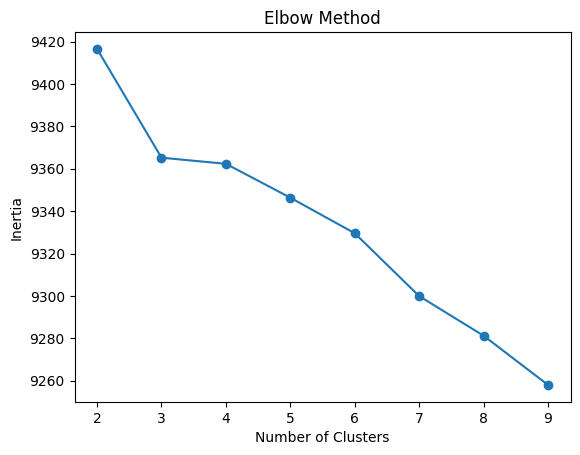

Cluster 0 Sample Sentences:
 - trump moved trolling outright mocking justin trudeau trump calls trudeau governor great state canada trump shared post calling justin trudeau governor great state canada discussing talks tariffs trade canada going major pain coming days
 - trump suggests canada made americas st state trudeau governor country cant survive without taking billion annually america
 - bhatke hue yuva ep sabarmati report vikrant massey maharashtra elections trump
 - tax us tax us presidentelect donald trump threatens india reciprocal tariff
 - trump threatens tariff bric bloc nations act undermine us dollar


Cluster 1 Sample Sentences:
 - weekly theory discussion thread socialism introductory reading list week use thread discuss theory might recently read post doubts concepts also post feel important quotes works currently reading beginners socialism made reading list principles communism frederick engels socialism utopian scientific frederick engels wage labour capital karl m

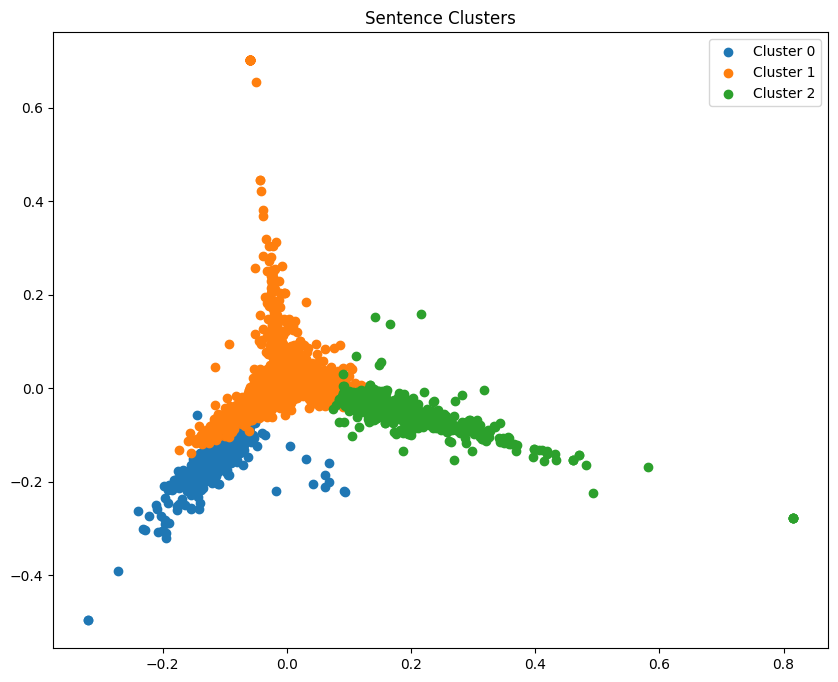

Clustered data saved to 'ST_ClusteredData_02.csv'


In [27]:


def load_data(file):
    df = pd.read_csv(file)
    df = df.dropna(subset=['text_combined'])
    sentences = []
    for text in df['text_combined']:
        sentences.extend(sent_tokenize(text))
    return df, sentences

def get_tfidf(sentences, max_feat=5000):
    vec = TfidfVectorizer(max_features=max_feat, stop_words='english')
    tfidf = vec.fit_transform(sentences)
    return tfidf, vec

def best_clusters(tfidf, max_k=10):
    inertia = []
    for k in range(2, max_k):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(tfidf)
        inertia.append(km.inertia_)
    plt.plot(range(2, max_k), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def cluster_sentences(tfidf, n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    labels = km.fit_predict(tfidf)
    return labels, km

def cluster_samples(sentences, labels, n_samples=5):
    data = pd.DataFrame({'sentence': sentences, 'cluster': labels})
    for cluster in sorted(data['cluster'].unique()):
        print(f"Cluster {cluster} Sample Sentences:")
        samples = data[data['cluster'] == cluster]['sentence'].head(n_samples)
        for sent in samples:
            print(f" - {sent}")
        print("\n")

def reduce_dims(tfidf):
    pca = PCA(n_components=2)
    coords = pca.fit_transform(tfidf.toarray())
    return coords

def plot_clusters(coords, labels):
    plt.figure(figsize=(10, 8))
    for cluster in set(labels):
        plt.scatter(coords[labels == cluster, 0], coords[labels == cluster, 1], label=f'Cluster {cluster}')
    plt.title('Sentence Clusters')
    plt.legend()
    plt.savefig('ST_Clusters.png')
    plt.show()

if __name__ == "__main__":
    file = "CleanedData.csv"

    df, sentences = load_data(file)

    tfidf, vec = get_tfidf(sentences)

    best_clusters(tfidf)

    n_clusters = 3
    labels, km = cluster_sentences(tfidf, n_clusters)

    cluster_samples(sentences, labels)

    coords = reduce_dims(tfidf)
    plot_clusters(coords, labels)

    clustered_sentences = pd.DataFrame({
        'sentence': sentences,
        'cluster': labels
    })
    clustered_sentences.to_csv("ST_ClusteredData_02.csv", index=False)
    print("Clustered data saved to 'ST_ClusteredData_02.csv'")
